In [1]:
import jax.numpy as jnp
import jax.nn as jnn
import numpy as np

from src.pde import fd_solve, u_exact
from src.pinn import train_pinn
from src.experiment import test_explicit_scheme_at_t, absolute_error, relative_error
from src.plotting import (
    plot_solution_at_t,
    plot_scheme_error_at_t
)

In [2]:
Nx1 = 10
Ny1 = 10

Nx2 = 100
Ny2 = 100
T = 2.0

t1 = 0.07
t2 = 0.30
t3 = T

# Constant Coefficiants

## 1D 

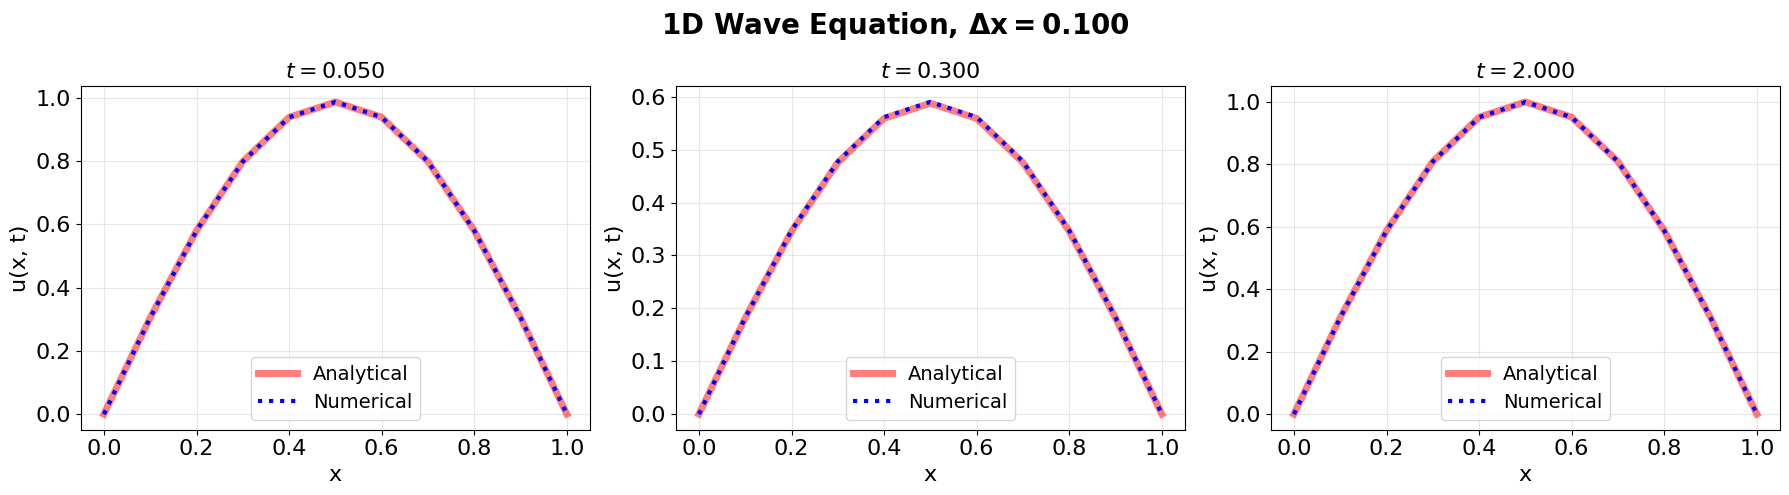

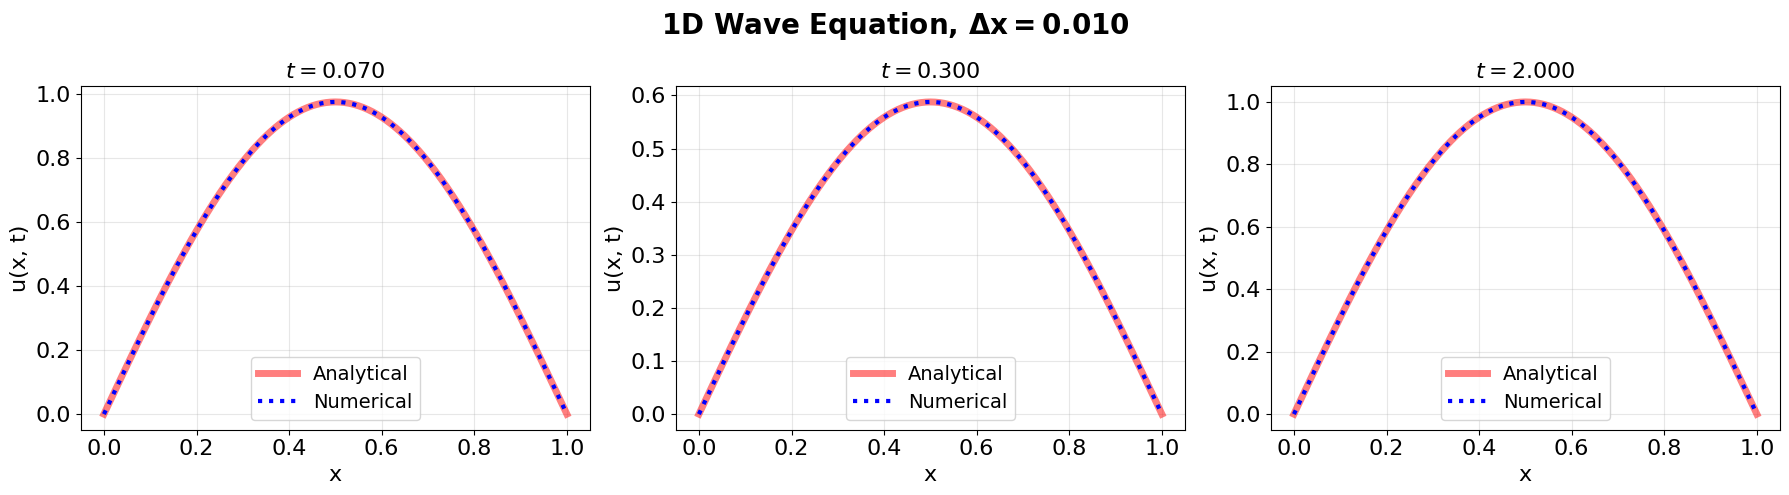

In [3]:
# ===== FD vs Analytical Nx1=10 -> dx=0.1=====
fd_t1_1D_Nx1 = test_explicit_scheme_at_t(Nx=Nx1, T=T, t_eval=t1, dim=1)
fd_t2_1D_Nx1 = test_explicit_scheme_at_t(Nx=Nx1, T=T, t_eval=t2, dim=1)
fd_t3_1D_Nx1 = test_explicit_scheme_at_t(Nx=Nx1, T=T, t_eval=t3, dim=1)

# ===== FD vs Analytical Nx2=100 -> dx=0.01 =====
fd_t1_1D_Nx2 = test_explicit_scheme_at_t(Nx=Nx2, T=T, t_eval=t1, dim=1)
fd_t2_1D_Nx2 = test_explicit_scheme_at_t(Nx=Nx2, T=T, t_eval=t2, dim=1)
fd_t3_1D_Nx2 = test_explicit_scheme_at_t(Nx=Nx2, T=T, t_eval=t3, dim=1)

# ===== Solutions for Nx1 =====
plot_solution_at_t(
    grid=[fd_t1_1D_Nx1["grid"], fd_t2_1D_Nx1["grid"], fd_t3_1D_Nx1["grid"]],
    u_num=[fd_t1_1D_Nx1["u_num"], fd_t2_1D_Nx1["u_num"], fd_t3_1D_Nx1["u_num"]],
    u_true=[fd_t1_1D_Nx1["u_true"], fd_t2_1D_Nx1["u_true"], fd_t3_1D_Nx1["u_true"]],
    dx=fd_t1_1D_Nx1["dx"],
    t=[fd_t1_1D_Nx1["t"], fd_t2_1D_Nx1["t"], fd_t3_1D_Nx1["t"]],
    dim=fd_t1_1D_Nx1["dim"],
    filepath=f"figs/solution_1D_Nx{Nx1}_dx{fd_t1_1D_Nx1['dx']:.3f}.pdf",
)

# ===== Solutions for Nx2 =====
plot_solution_at_t(
    grid=[fd_t1_1D_Nx2["grid"], fd_t2_1D_Nx2["grid"], fd_t3_1D_Nx2["grid"]],
    u_num=[fd_t1_1D_Nx2["u_num"], fd_t2_1D_Nx2["u_num"], fd_t3_1D_Nx2["u_num"]],
    u_true=[fd_t1_1D_Nx2["u_true"], fd_t2_1D_Nx2["u_true"], fd_t3_1D_Nx2["u_true"]],
    dx=fd_t1_1D_Nx2["dx"],
    t=[fd_t1_1D_Nx2["t"], fd_t2_1D_Nx2["t"], fd_t3_1D_Nx2["t"]],
    dim=fd_t1_1D_Nx2["dim"],
    filepath=f"figs/solution_1D_Nx{Nx2}_dx{fd_t1_1D_Nx2['dx']:.3f}.pdf",
)

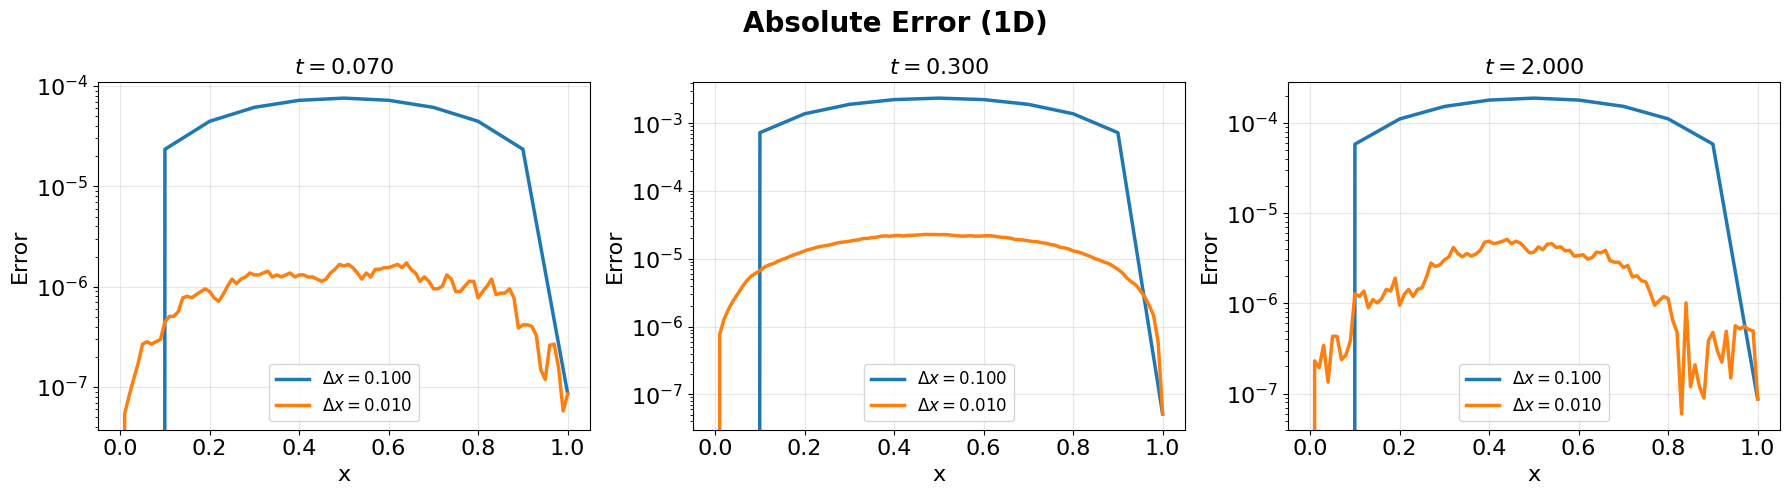

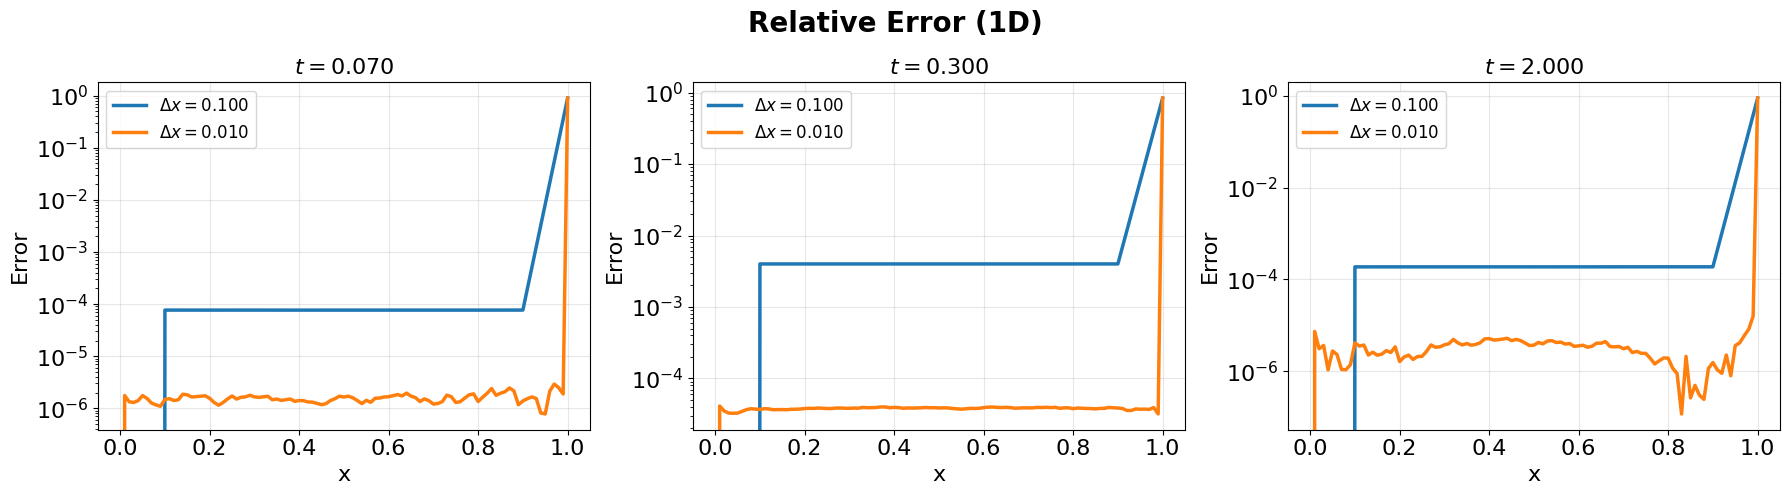

In [11]:
abs_error_data_1D = [
    # Nx1 data
    {
        'grid': fd_t1_1D_Nx1["grid"],
        'error': [
            absolute_error(fd_t1_1D_Nx1["u_num"], fd_t1_1D_Nx1["u_true"]),
            absolute_error(fd_t2_1D_Nx1["u_num"], fd_t2_1D_Nx1["u_true"]),
            absolute_error(fd_t3_1D_Nx1["u_num"], fd_t3_1D_Nx1["u_true"])
        ],
        'dx': fd_t1_1D_Nx1["dx"]
    },
    # Nx2 data
    {
        'grid': fd_t1_1D_Nx2["grid"],
        'error': [
            absolute_error(fd_t1_1D_Nx2["u_num"], fd_t1_1D_Nx2["u_true"]),
            absolute_error(fd_t2_1D_Nx2["u_num"], fd_t2_1D_Nx2["u_true"]),
            absolute_error(fd_t3_1D_Nx2["u_num"], fd_t3_1D_Nx2["u_true"])
        ],
        'dx': fd_t1_1D_Nx2["dx"]
    }
]

rel_error_data_1D = [
    # Nx1 data
    {
        'grid': fd_t1_1D_Nx1["grid"],
        'error': [
            relative_error(fd_t1_1D_Nx1["u_num"], fd_t1_1D_Nx1["u_true"]),
            relative_error(fd_t2_1D_Nx1["u_num"], fd_t2_1D_Nx1["u_true"]),
            relative_error(fd_t3_1D_Nx1["u_num"], fd_t3_1D_Nx1["u_true"])
        ],
        'dx': fd_t1_1D_Nx1["dx"]
    },
    # Nx2 data
    {
        'grid': fd_t1_1D_Nx2["grid"],
        'error': [
            relative_error(fd_t1_1D_Nx2["u_num"], fd_t1_1D_Nx2["u_true"]),
            relative_error(fd_t2_1D_Nx2["u_num"], fd_t2_1D_Nx2["u_true"]),
            relative_error(fd_t3_1D_Nx2["u_num"], fd_t3_1D_Nx2["u_true"])
        ],
        'dx': fd_t1_1D_Nx2["dx"]
    }
]

plot_scheme_error_at_t(
    grid=abs_error_data_1D,
    error=None,
    dx=None,
    t=[t1, t2, t3],
    dim=1,
    title="Absolute Error (1D)",
    filepath="figs/abs_error_multi_dx_1D.pdf",
    log_scale=True,
)

plot_scheme_error_at_t(
    grid=rel_error_data_1D,
    error=None,
    dx=None,
    t=[t1, t2, t3],
    dim=1,
    title="Relative Error (1D)",
    filepath="figs/rel_error_multi_dx_1D.pdf",
    log_scale=True,
)

## 2D

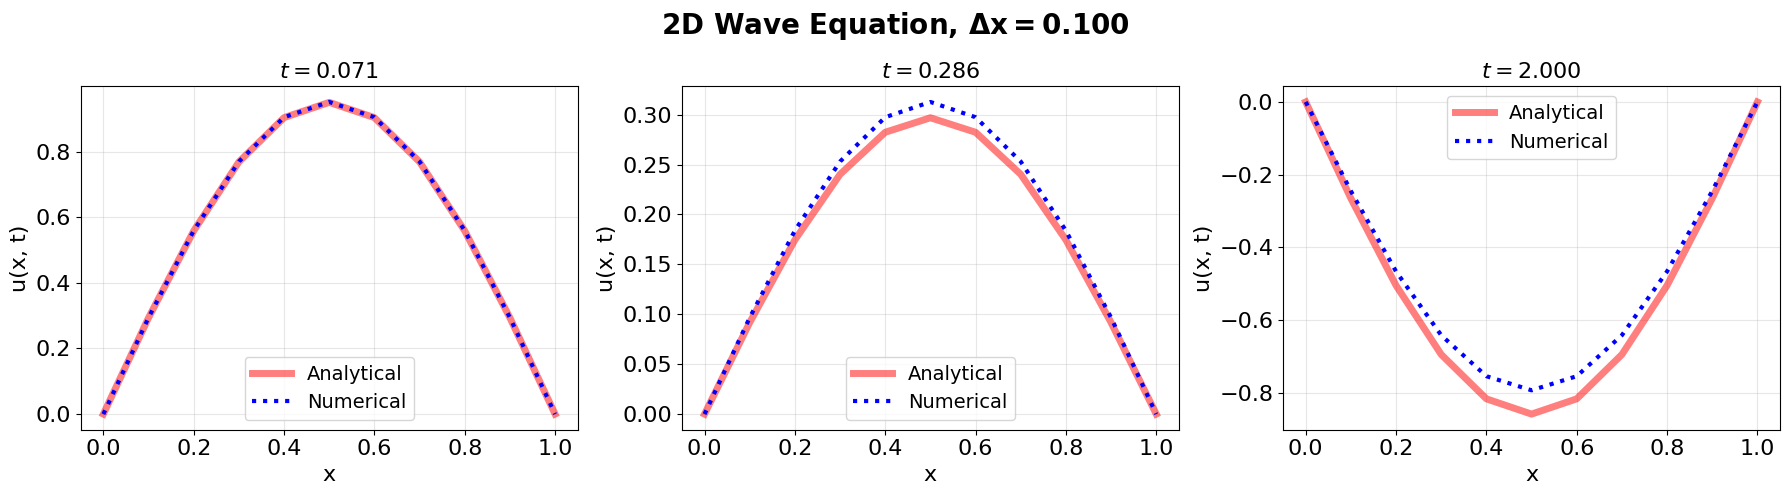

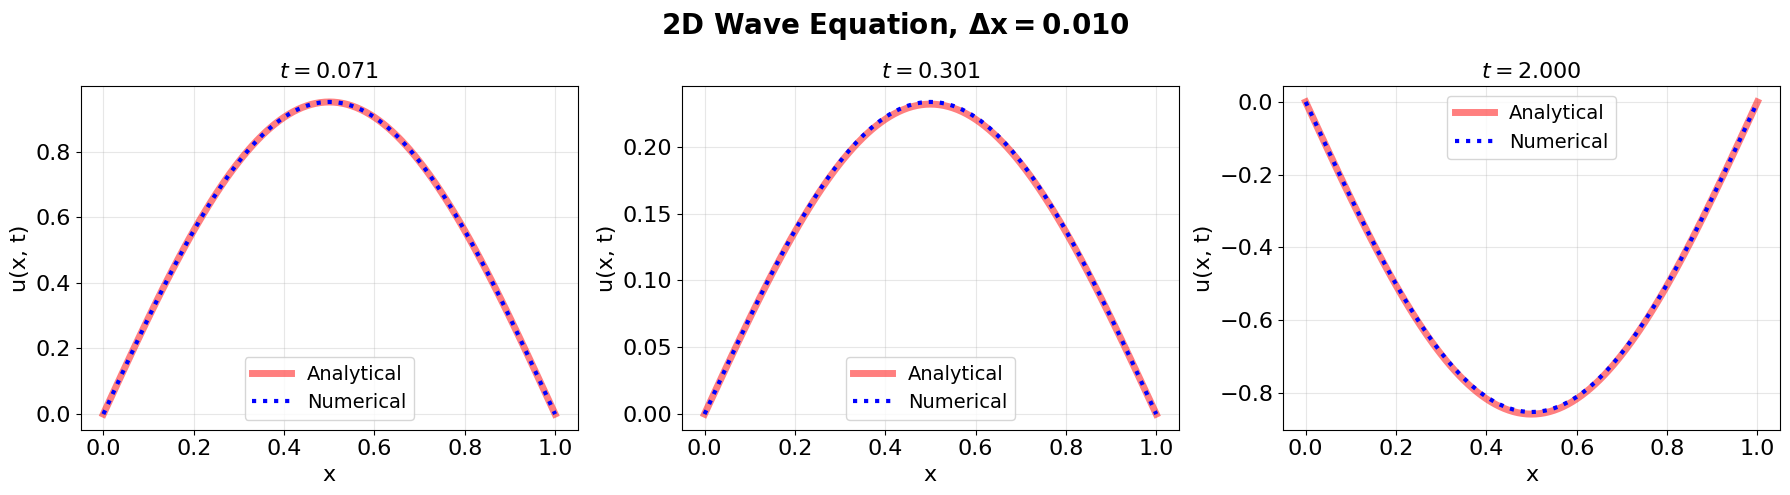

In [4]:
# ===== FD vs Analytical Nx1=10 -> dx=0.1=====
fd_t1_2D_Nx1 = test_explicit_scheme_at_t(Nx=Nx1, Ny=Ny1, T=T, t_eval=t1, dim=2)
fd_t2_2D_Nx1 = test_explicit_scheme_at_t(Nx=Nx1, Ny=Ny1, T=T, t_eval=t2, dim=2)
fd_t3_2D_Nx1 = test_explicit_scheme_at_t(Nx=Nx1, Ny=Ny1, T=T, t_eval=t3, dim=2)

# ===== FD vs Analytical Nx2=100 -> dx=0.01 =====
fd_t1_2D_Nx2 = test_explicit_scheme_at_t(Nx=Nx2, Ny=Ny2, T=T, t_eval=t1, dim=2)
fd_t2_2D_Nx2 = test_explicit_scheme_at_t(Nx=Nx2, Ny=Ny2, T=T, t_eval=t2, dim=2)
fd_t3_2D_Nx2 = test_explicit_scheme_at_t(Nx=Nx2, Ny=Ny2, T=T, t_eval=t3, dim=2)

# ===== Solutions for Nx1 =====
plot_solution_at_t(
    grid=[fd_t1_2D_Nx1["grid"], fd_t2_2D_Nx1["grid"], fd_t3_2D_Nx1["grid"]],
    u_num=[fd_t1_2D_Nx1["u_num"], fd_t2_2D_Nx1["u_num"], fd_t3_2D_Nx1["u_num"]],
    u_true=[fd_t1_2D_Nx1["u_true"], fd_t2_2D_Nx1["u_true"], fd_t3_2D_Nx1["u_true"]],
    dx=fd_t1_2D_Nx1["dx"],
    t=[fd_t1_2D_Nx1["t"], fd_t2_2D_Nx1["t"], fd_t3_2D_Nx1["t"]],
    dim=fd_t1_2D_Nx1["dim"],
    filepath=f"figs/solution_2D_Nx{Nx1}_dx{fd_t1_2D_Nx1['dx']:.3f}.pdf",
)

# ===== Solutions for Nx2 =====
plot_solution_at_t(
    grid=[fd_t1_2D_Nx2["grid"], fd_t2_2D_Nx2["grid"], fd_t3_2D_Nx2["grid"]],
    u_num=[fd_t1_2D_Nx2["u_num"], fd_t2_2D_Nx2["u_num"], fd_t3_2D_Nx2["u_num"]],
    u_true=[fd_t1_2D_Nx2["u_true"], fd_t2_2D_Nx2["u_true"], fd_t3_2D_Nx2["u_true"]],
    dx=fd_t1_2D_Nx2["dx"],
    t=[fd_t1_2D_Nx2["t"], fd_t2_2D_Nx2["t"], fd_t3_2D_Nx2["t"]],
    dim=fd_t1_2D_Nx2["dim"],
    filepath=f"figs/solution_2D_Nx{Nx2}_dx{fd_t1_2D_Nx2['dx']:.3f}.pdf",
)

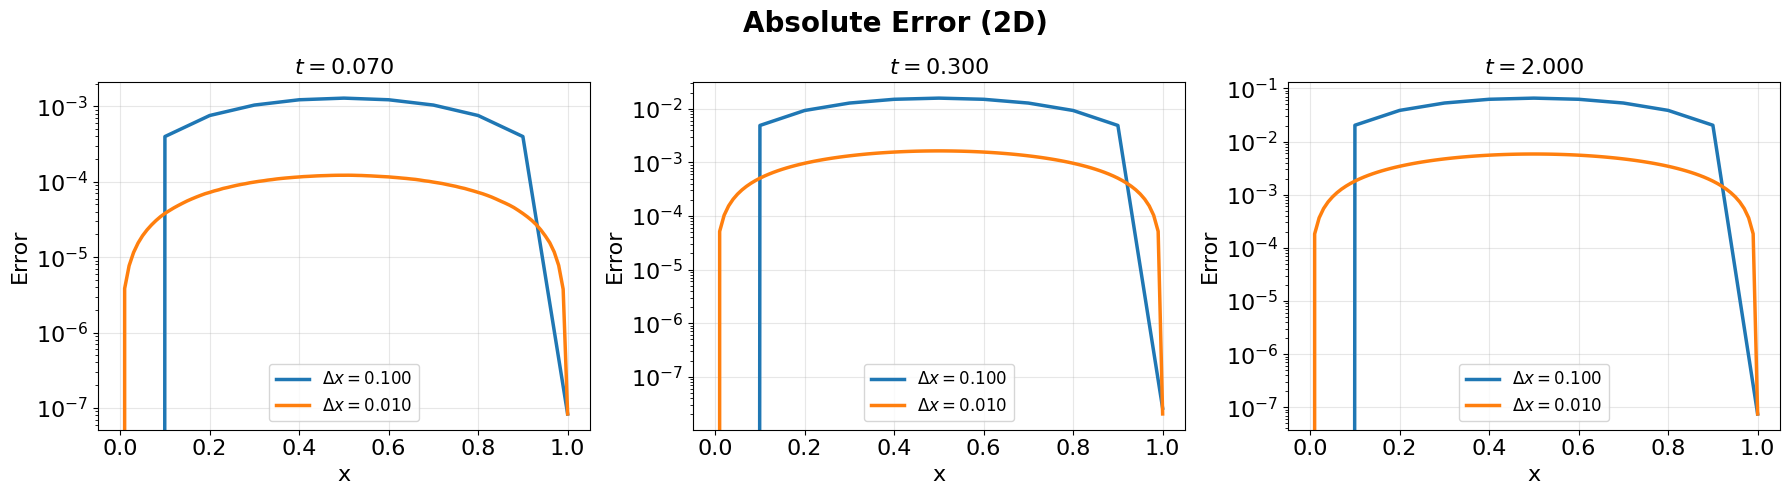

In [5]:
error_data_2D = [
    # Nx1 data
    {
        'grid': fd_t1_2D_Nx1["grid"],
        'error': [
            absolute_error(fd_t1_2D_Nx1["u_num"], fd_t1_2D_Nx1["u_true"]),
            absolute_error(fd_t2_2D_Nx1["u_num"], fd_t2_2D_Nx1["u_true"]),
            absolute_error(fd_t3_2D_Nx1["u_num"], fd_t3_2D_Nx1["u_true"])
        ],
        'dx': fd_t1_2D_Nx1["dx"]
    },
    # Nx2 data
    {
        'grid': fd_t1_2D_Nx2["grid"],
        'error': [
            absolute_error(fd_t1_2D_Nx2["u_num"], fd_t1_2D_Nx2["u_true"]),
            absolute_error(fd_t2_2D_Nx2["u_num"], fd_t2_2D_Nx2["u_true"]),
            absolute_error(fd_t3_2D_Nx2["u_num"], fd_t3_2D_Nx2["u_true"])
        ],
        'dx': fd_t1_2D_Nx2["dx"]
    }
]

plot_scheme_error_at_t(
    grid=error_data_2D,
    error=None,
    dx=None,
    t=[t1, t2, t3],
    dim=2,
    title="Absolute Error (2D)",
    filepath="figs/abs_error_multi_dx_2D.pdf",
    log_scale=True,
)

# Space dependent coefficients

## 1D